# Análise Parque Eólico - 2016 / 2017

## Análise dos dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sweetviz
from matplotlib.pyplot import figure
from windrose import WindroseAxes
import dataframe_image as dfi

In [2]:
turbina = pd.read_csv('Power_curve (1).csv')

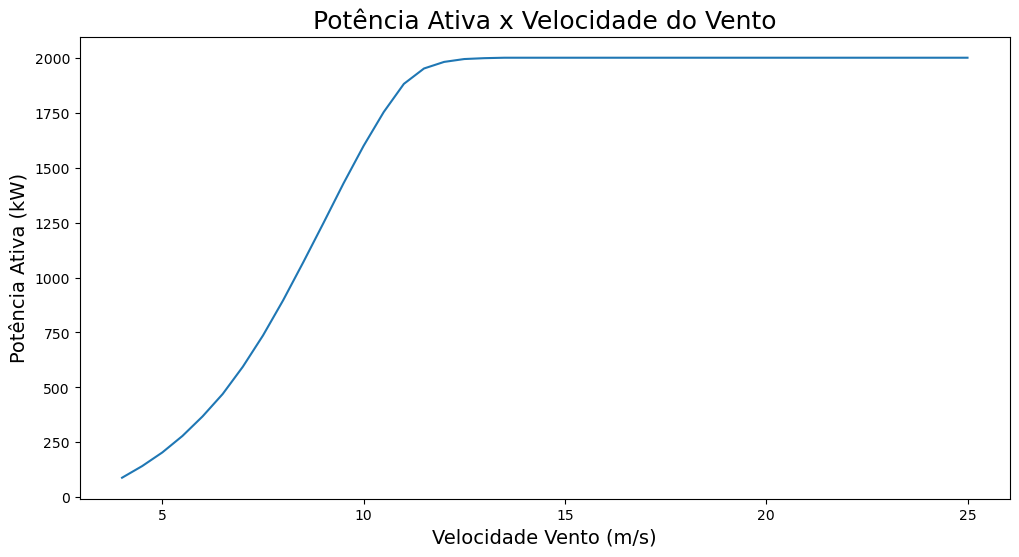

In [3]:
ax = sns.lineplot(data = turbina, x = 'Wind speed (m/s)', y = 'Power (kW)')
ax.figure.set_size_inches(12, 6)

ax.set_title('Potência Ativa x Velocidade do Vento', fontsize=18)
ax.set_xlabel('Velocidade Vento (m/s)', fontsize=14)
ax.set_ylabel('Potência Ativa (kW)', fontsize=14)

ax;

In [4]:
base = pd.read_csv('wind-farm-2016.csv', sep= ';')
base2 = pd.read_csv('wind-farm-2017.csv', sep= ';')

In [5]:
base.shape

(207905, 83)

In [6]:
base2['Turbine_ID'].unique()

array(['T06', 'T01', 'T07', 'T11'], dtype=object)

In [7]:
# analise=sweetviz.analyze(dados)
# analise.show_html()

* Amb_WindSpeed_Max            207905 non-null  float64
* Amb_WindSpeed_Min            207905 non-null  float64
* Amb_WindSpeed_Avg            207905 non-null  float64
* Amb_WindSpeed_Std            207905 non-null  float64
* Amb_WindDir_Relative_Avg     207905 non-null  float64
* Amb_WindDir_Abs_Avg          207905 non-null  float64
* Amb_Temp_Avg                 207905 non-null  int64  
* Amb_WindSpeed_Est_Avg

In [15]:
dados  =  base[['Turbine_ID', 'Timestamp', 'Amb_WindSpeed_Max', 'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std', 'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg', 'Amb_WindSpeed_Est_Avg', 'Prod_LatestAvg_TotActPwr']][:]
dados2 = base2[['Turbine_ID', 'Timestamp', 'Amb_WindSpeed_Max', 'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std', 'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg', 'Amb_WindSpeed_Est_Avg', 'Prod_LatestAvg_TotActPwr']][:]


dados['Timestamp'] = pd.to_datetime(dados['Timestamp'])
dados['Timestamp'] = pd.to_numeric(dados['Timestamp'])

dados2['Timestamp'] = pd.to_datetime(dados2['Timestamp'])
dados2['Timestamp'] = pd.to_numeric(dados2['Timestamp'])

dados2 = dados2.reset_index(drop=True)

#troca = {'T06': 6,'T01': 1,'T11': 11,'T07':7}

#dados['Turbine_ID'] = dados['Turbine_ID'].map(troca)
#dados2['Turbine_ID'] = dados2['Turbine_ID'].map(troca)

print(len(dados.columns))
print(len(dados2.columns))

11
11


In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207905 entries, 0 to 207904
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Turbine_ID                207905 non-null  object 
 1   Timestamp                 207905 non-null  int64  
 2   Amb_WindSpeed_Max         207905 non-null  float64
 3   Amb_WindSpeed_Min         207905 non-null  float64
 4   Amb_WindSpeed_Avg         207905 non-null  float64
 5   Amb_WindSpeed_Std         207905 non-null  float64
 6   Amb_WindDir_Relative_Avg  207905 non-null  float64
 7   Amb_WindDir_Abs_Avg       207905 non-null  float64
 8   Amb_Temp_Avg              207905 non-null  int64  
 9   Amb_WindSpeed_Est_Avg     207905 non-null  float64
 10  Prod_LatestAvg_TotActPwr  207905 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 17.4+ MB


In [17]:
dados.describe()

,Timestamp,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Amb_Temp_Avg,Amb_WindSpeed_Est_Avg,Prod_LatestAvg_TotActPwr
count,2.079050e+05,207905.000000,207905.000000,207905.000000,207905.000000,207905.000000,207905.000000,207905.000000,207905.000000,207905.000000
mean,1.467373e+18,12.609602,1.626667,5.941168,1.165898,0.369432,183.223857,19.616907,5.932237,86373.735740
std,9.173785e+15,7.388508,1.157973,3.582129,0.775793,33.897539,94.884270,5.372255,3.511758,109632.141084
min,1.451606e+18,0.400000,0.400000,0.400000,0.000000,-180.000000,0.000000,6.000000,0.000000,-5027.000000
25%,1.459409e+18,6.800000,0.700000,3.100000,0.600000,-10.500000,100.800000,15.000000,3.100000,-675.000000
50%,1.467221e+18,10.800000,1.500000,5.200000,1.000000,0.200000,163.500000,19.000000,5.300000,34052.000000
75%,1.475366e+18,17.600000,2.200000,8.100000,1.500000,10.000000,272.500000,24.000000,8.100000,141526.000000
max,1.483228e+18,70.000000,14.600000,22.500000,55.100000,180.000000,359.000000,41.000000,22.100000,334398.000000


In [18]:
dados = dados.query('Prod_LatestAvg_TotActPwr > 1')
dados2 = dados.query('Prod_LatestAvg_TotActPwr > 1')

In [19]:
len(base.query('Prod_LatestAvg_TotActPwr >= 300000'))

19697

In [20]:
dados.shape

(144273, 11)

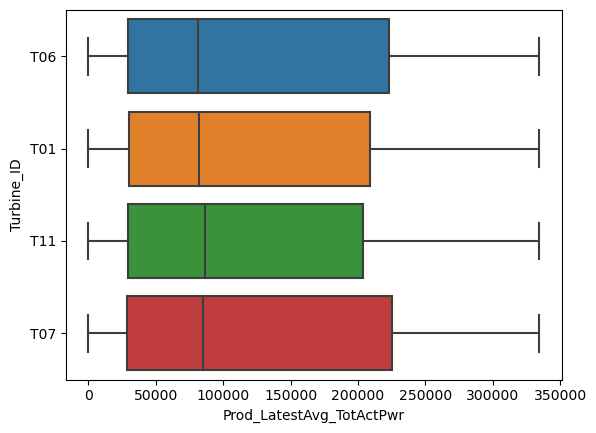

In [21]:
sns.boxplot(x = 'Prod_LatestAvg_TotActPwr', y = 'Turbine_ID', data = dados, orient = 'h');
plt.savefig('boxplot.png')

mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool_))
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), mask=mask, square=True, annot=True, vmin=-1, vmax=1)
plt.show()

## Plotando base

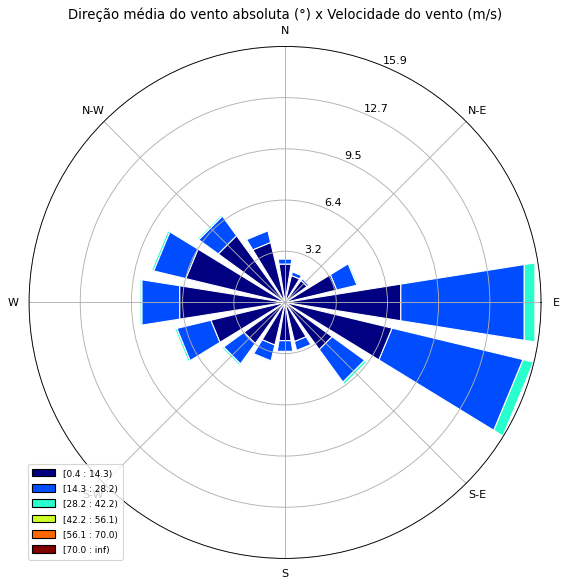

In [15]:
ax = WindroseAxes.from_ax()
ax.bar(base['Amb_WindDir_Abs_Avg'], base['Amb_WindSpeed_Max'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Direção média do vento absoluta (°) x Velocidade do vento (m/s)")
plt.show()

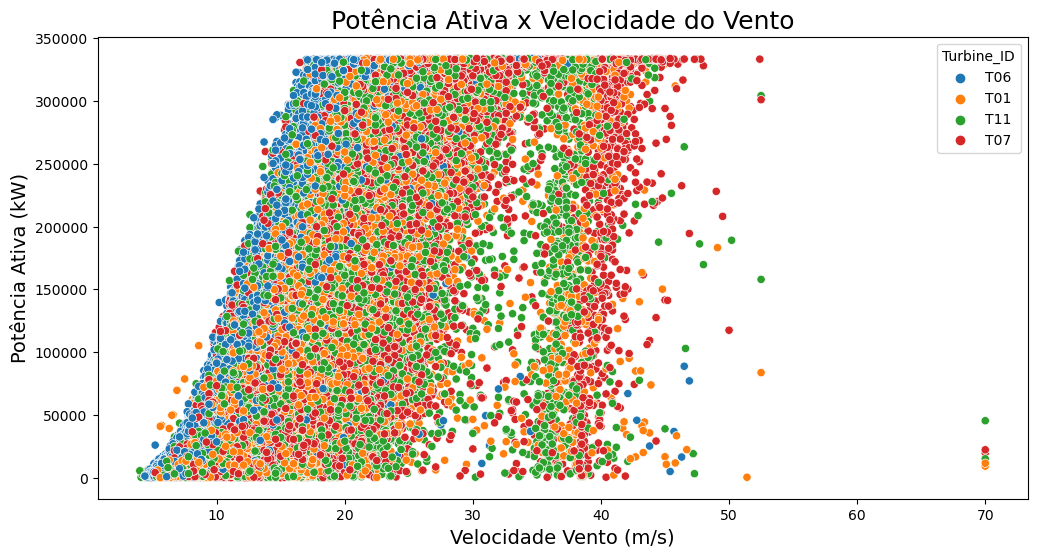

In [16]:
ax = sns.scatterplot(data = base.query('Prod_LatestAvg_TotActPwr > 1'), x = 'Amb_WindSpeed_Max', y = 'Prod_LatestAvg_TotActPwr', hue = 'Turbine_ID')
ax.figure.set_size_inches(12, 6)

ax.set_title('Potência Ativa x Velocidade do Vento', fontsize=18)
ax.set_xlabel('Velocidade Vento (m/s)', fontsize=14)
ax.set_ylabel('Potência Ativa (kW)', fontsize=14)
plt.savefig('scatter.png')
ax;

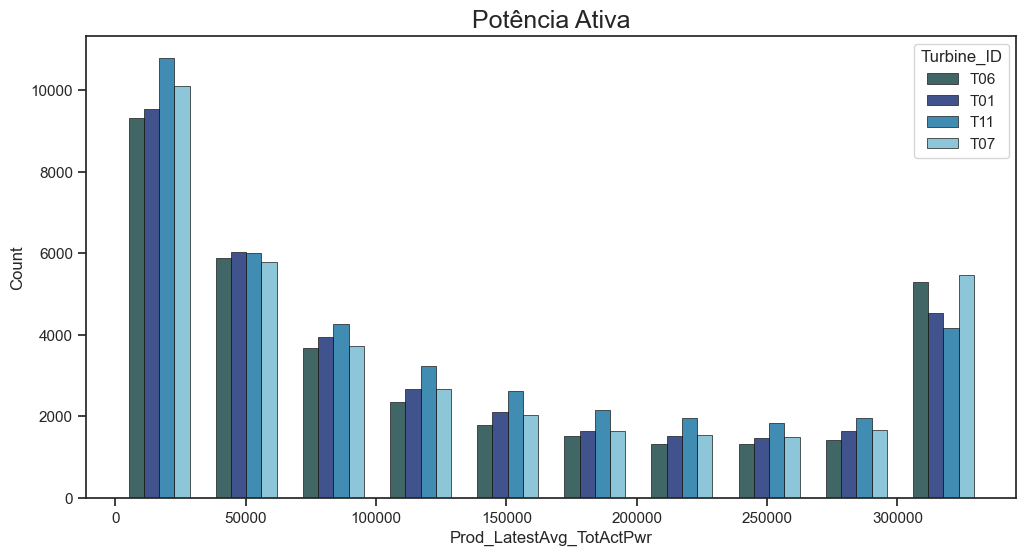

In [17]:
sns.set_theme(style="ticks")

#sns.despine(left=True)
f, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Potência Ativa', fontsize=18)

sns.histplot(
    base.query('Prod_LatestAvg_TotActPwr > 1'),
    x= 'Prod_LatestAvg_TotActPwr',
    multiple="dodge",
    edgecolor=".1",
    linewidth=.5,
    stat='count',
    shrink=.7,
    bins= 10,
    hue= 'Turbine_ID',
    palette= 'ocean'    
)
plt.savefig('histplot');

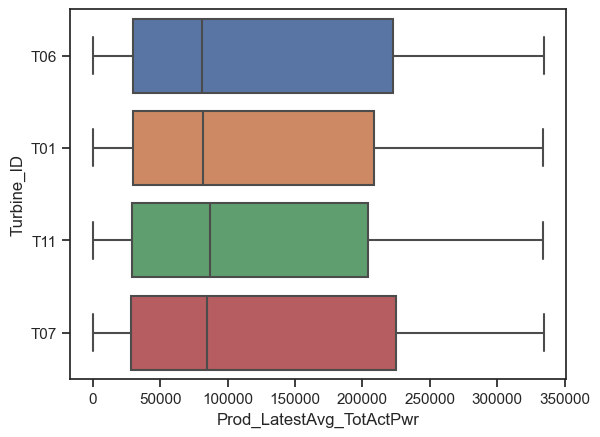

In [18]:
sns.boxplot(x = 'Prod_LatestAvg_TotActPwr', y = 'Turbine_ID', data = base.query('Prod_LatestAvg_TotActPwr > 1'), orient = 'h');

# Aplicação de Machine Learning

In [19]:
x = dados[
    ['Turbine_ID',
     'Timestamp',
     'Amb_WindSpeed_Max',
     'Amb_WindSpeed_Min',
     'Amb_WindSpeed_Avg',
     'Amb_WindSpeed_Std',
     'Amb_WindDir_Relative_Avg',
     'Amb_WindDir_Abs_Avg',
     'Amb_Temp_Avg',
     'Amb_WindSpeed_Est_Avg']
]

y = dados['Prod_LatestAvg_TotActPwr']



In [20]:
x2 = dados2[
    ['Turbine_ID',
     'Timestamp',
     'Amb_WindSpeed_Max',
     'Amb_WindSpeed_Min',
     'Amb_WindSpeed_Avg',
     'Amb_WindSpeed_Std',
     'Amb_WindDir_Relative_Avg',
     'Amb_WindDir_Abs_Avg',
     'Amb_Temp_Avg',
     'Amb_WindSpeed_Est_Avg']
]


y2 = dados2['Prod_LatestAvg_TotActPwr']



## Decision Tree

In [ ]:
# 1
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# 2
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=1, train_size=0.8)

# 3
modelo = DecisionTreeRegressor(random_state=1,min_samples_leaf=15)
modelo.fit(treino_x, treino_y)

print(f'Treinaremos com {len(treino_x)} e testaremos com {len(teste_x)}')


### Predição de Dados de 2016

In [ ]:

# 1 
previsao = modelo.predict(teste_x)

# 2
acuracia = r2_score(teste_y, previsao)
media_erro = mean_absolute_error(teste_y, previsao)
print(f'A acurácia foi de {acuracia * 100 :.2f}%')
print(f'A média de erro foi de {media_erro :.2f}')


In [ ]:
df = pd.DataFrame.copy(teste_x)
df['ValorReal'] = teste_y
df = df.reset_index(drop=True)
df['ValorPredito'] = pd.DataFrame(previsao).round()
df.sample(10)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[['Timestamp' ,'ValorReal', 'ValorPredito']]
df['dif (%)'] = (abs(df['ValorReal'] - df['ValorPredito']) * 100) / df['ValorReal']
df = df.sample(5)

In [ ]:
df.sample(5)

In [ ]:
sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Potência Ativa - Frequência', fontsize=18)

sns.histplot(
    df,
    multiple="dodge",
    palette="ocean",
    edgecolor=".1",
    linewidth=.5,
    stat='count',
    shrink=.7,
    bins= 10
);

In [ ]:
dfi.export(df, 'df.png')

In [ ]:
df = df.describe().round()
dfi.export(df, 'df.png')

### Predição de Dados de 2017

In [ ]:
# 1
previsao = modelo.predict(x2)

# 2
acuracia = r2_score(y2, previsao)
media_erro = mean_absolute_error(y2, previsao)

# 3
print(f'A acurácia foi de {acuracia * 100 :.2f}%')
print(f'A média de erro foi de {media_erro :.2f}')

In [ ]:
df = pd.DataFrame.copy(x2)
df['ValorReal'] = y2
df = df.reset_index(drop=True)
df['ValorPredito'] = pd.DataFrame(previsao).round()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[['Timestamp' ,'ValorReal', 'ValorPredito']]
df['dif (%)'] = (abs(df['ValorReal'] - df['ValorPredito']) * 100) / df['ValorReal']
df = df.sample(5)
df

In [ ]:
sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Potência Ativa - Frequência', fontsize=18)

sns.histplot(
    df,
    multiple="dodge",
    palette="ocean",
    edgecolor=".1",
    linewidth=.5,
    stat='count',
    shrink=.7,
    bins= 10
);

In [ ]:
x2.shape

In [ ]:
df = df.describe().round()
dfi.export(df, 'df.png')

## Random Forest

In [21]:
# 1
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# 2
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=1, train_size=0.8)

# 3
modelo = RandomForestRegressor(random_state=1,n_jobs=-1, n_estimators=20)
modelo.fit(treino_x, treino_y)

print(f'Treinaremos com {len(treino_x)} e testaremos com {len(teste_x)}')

Treinaremos com 115418 e testaremos com 28855


#### Predição de Dados de 2016

In [22]:
previsao = modelo.predict(teste_x)

acuracia = r2_score(teste_y, previsao)
media_erro = mean_absolute_error(teste_y, previsao)

print(f'A acurácia foi de {acuracia * 100 :.2f}%')
print(f'A média de erro foi de {media_erro :.2f}')

A acurácia foi de 99.21%
A média de erro foi de 2239.69


In [23]:
df = pd.DataFrame.copy(teste_x)
df['ValorReal'] = teste_y
df = df.reset_index(drop=True)
df['ValorPredito'] = pd.DataFrame(previsao).round()
df.sample(10)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[['Timestamp' ,'ValorReal', 'ValorPredito']]
df.describe().round()


,ValorReal,ValorPredito
count,28855.0,28855.0
mean,125205.0,125244.0
std,111446.0,111158.0
min,8.0,271.0
25%,29832.0,30104.0
50%,83662.0,84158.0
75%,214840.0,214624.0
max,334282.0,333488.0


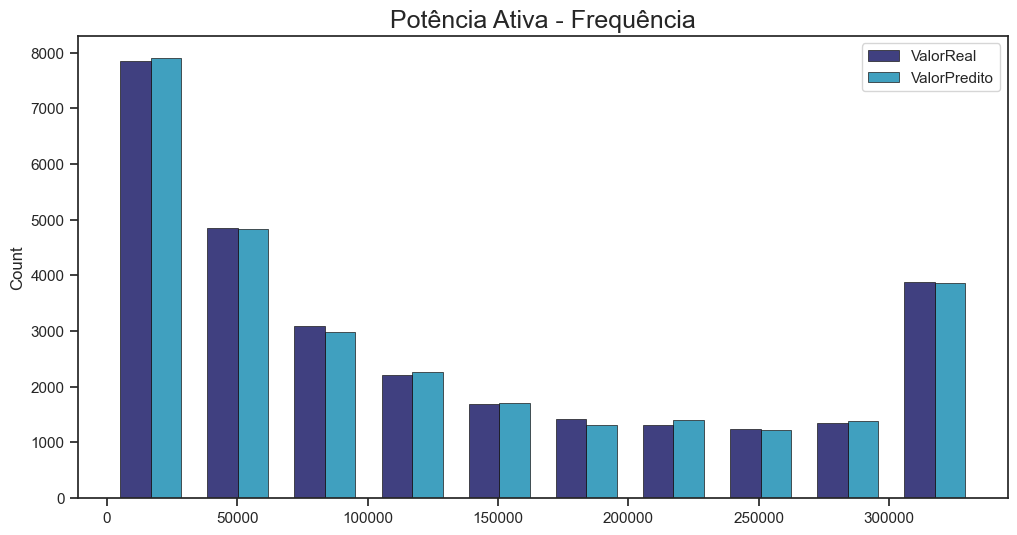

In [24]:
sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Potência Ativa - Frequência', fontsize=18)

sns.histplot(
    df,
    multiple="dodge",
    palette="ocean",
    edgecolor=".1",
    linewidth=.5,
    stat='count',
    shrink=.7,
    bins= 10
)
plt.savefig('histplot');

In [ ]:
df = df.describe().round()
dfi.export(df, 'df.png')

#### Predição de Dados de 2017

In [25]:
previsao = modelo.predict(x2)

acuracia = r2_score(y2, previsao)
media_erro = mean_absolute_error(y2, previsao)

print(f'A acurácia foi de {acuracia * 100 :.2f}%')
print(f'A média de erro foi de {media_erro :.2f}')

A acurácia foi de 99.76%
A média de erro foi de 1114.93


In [32]:
df = pd.DataFrame.copy(x2)
df['ValorReal'] = y2
df = df.reset_index(drop=True)
df['ValorPredito'] = pd.DataFrame(previsao).round()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[['Timestamp' ,'ValorReal', 'ValorPredito']]
df['dif (%)'] = (abs(df['ValorReal'] - df['ValorPredito']) * 100) / df['ValorReal']
df = df.describe().round()
df

,ValorReal,ValorPredito,dif (%)
count,144273.0,144273.0,144273.0
mean,124955.0,124948.0,10.0
std,111609.0,111376.0,315.0
min,2.0,63.0,0.0
25%,29303.0,29435.0,0.0
50%,83545.0,83854.0,1.0
75%,213941.0,213922.0,2.0
max,334398.0,334000.0,63978.0


In [30]:
dfi.export(df, 'df.png')

In [ ]:
df = pd.DataFrame.copy(teste_x)
df['ValorReal'] = teste_y
df = df.reset_index(drop=True)
df['ValorPredito'] = pd.DataFrame(previsao).round()
df.sample(10)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df[['Timestamp' ,'ValorReal', 'ValorPredito']]
df.describe().round()
